In [1]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

In [75]:
raw_data = pd.read_csv('btc_last.csv', delimiter=',', header=None)
raw_data['rowtime'] = pd.to_datetime(raw_data[0], format='%a %b %d %H:%M:%S %Z %Y')
raw_data['anomalyScore'] = raw_data[1]
raw_data.drop([0, 1], axis=1, inplace=True)

In [76]:
raw_data.head()

,rowtime,anomalyScore
0,2018-11-08 06:00:00,0.680325
1,2018-10-18 03:15:00,0.637551
2,2018-11-05 23:20:00,0.971427
3,2018-10-28 06:10:00,0.650192
4,2018-10-23 05:15:00,0.689069


In [79]:
# pyplot settup
plt.gcf().autofmt_xdate();
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 19
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size;

<Figure size 1368x432 with 0 Axes>

# October. The signals are grouped into 15 min timeframes

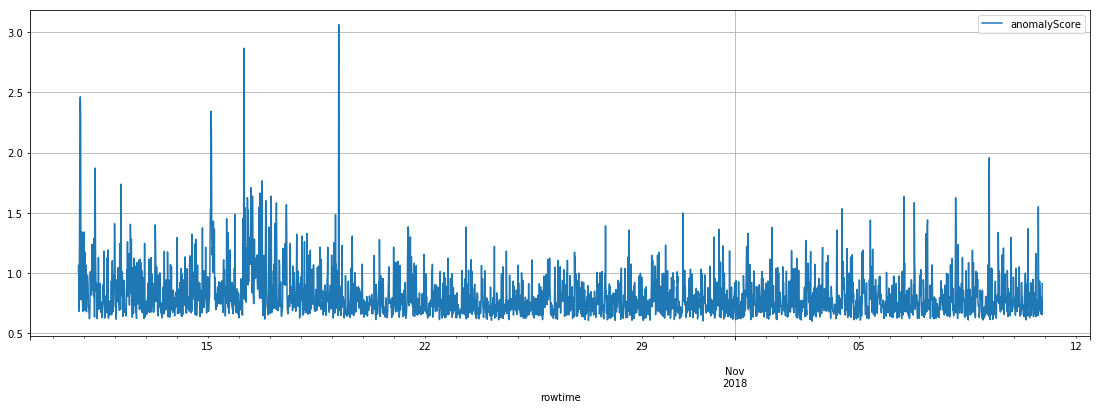

In [83]:
raw_data\
    .groupby(pd.Grouper(key='rowtime', freq='15Min'))\
    .agg({'anomalyScore':'mean'})\
    .sort_values(by=['rowtime'])\
    .plot(y='anomalyScore', grid=True, kind='line');

## Take a look at 11th, 15th, 16th and 19th. These days a client had been informed through the telegram bot

## *Look for the moment October 11th first:*

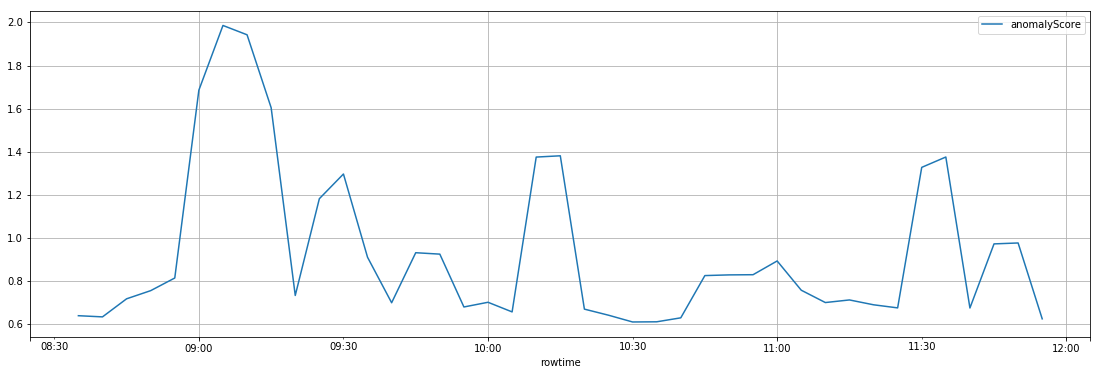

In [87]:
raw_data[(raw_data['rowtime'] > datetime.datetime(2018,10,11, 8, 30)) \
    & (raw_data['rowtime'] < datetime.datetime(2018,10,11, 12, 0))].sort_values(by=['rowtime'])\
    .plot(x='rowtime', y='anomalyScore', grid=True, kind='line');

## *The signal was generated at 9:00AM. The second and third notifications user got at 9:05am and 9:10am accordingly. At that time on the market:*

<img src="img/btc_2018-10-11.png">

## *We see that client had been notified before the price dumping*
## *Now lets take a look on October 15th:*

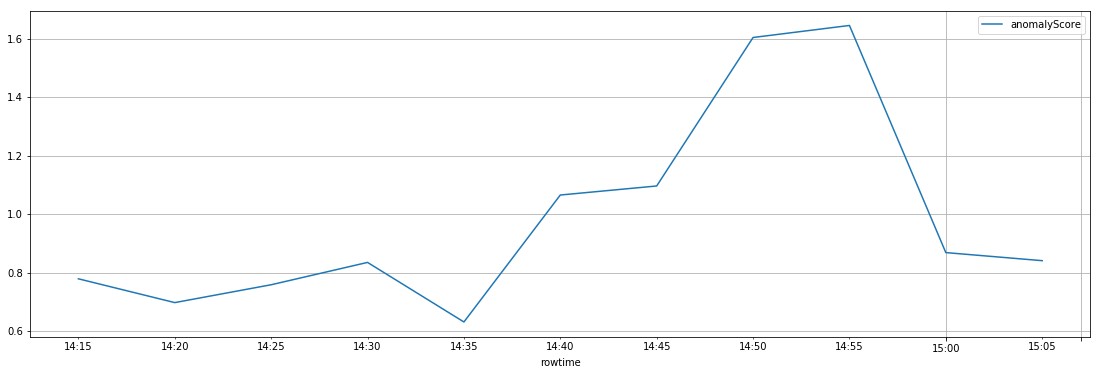

In [96]:
raw_data[(raw_data['rowtime'] > datetime.datetime(2018,10,15, 14, 10)) \
    & (raw_data['rowtime'] < datetime.datetime(2018,10,15, 15, 10))].sort_values(by=['rowtime'])\
    .plot(x='rowtime', y='anomalyScore', grid=True, kind='line');

## *The user got two notifications from 14:50 to 14:55. Market: *
<img src="img/btc_2018-10-15.png">

## The signals came when the price had been at the it's peek. The stablecoin, the USDT, dropped by as much as 15% as traders sold Tether 

## *October 16th:*

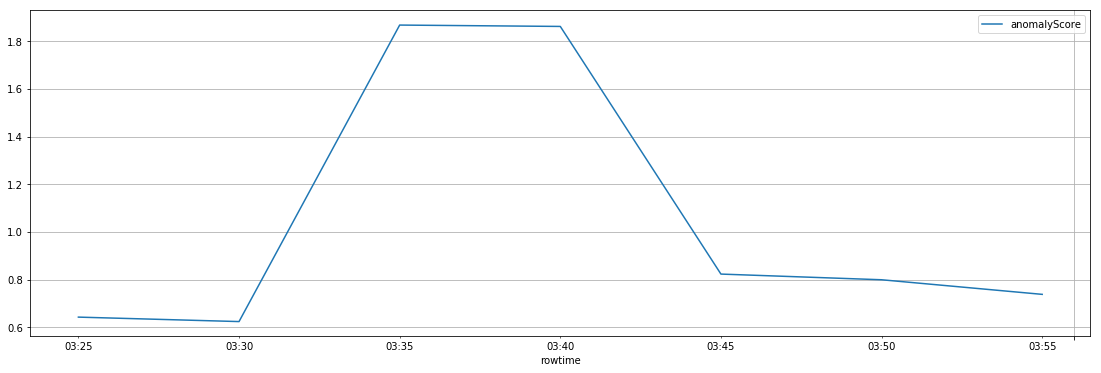

In [104]:
raw_data[(raw_data['rowtime'] > datetime.datetime(2018,10,16, 3, 20)) \
    & (raw_data['rowtime'] < datetime.datetime(2018,10,16, 4, 0))].sort_values(by=['rowtime'])\
    .plot(x='rowtime', y='anomalyScore', grid=True, kind='line');

## *We have here two notifications at 3:35am and at 3:40am. Market:*
<img src="img/btc_2018-10-16.png">

## *...False alarm*

## *October 19th:*

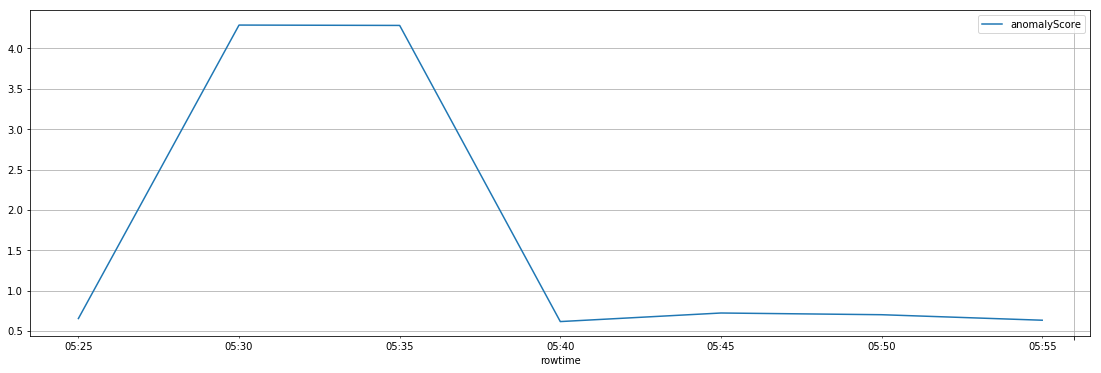

In [105]:
raw_data[(raw_data['rowtime'] > datetime.datetime(2018,10,19, 5, 20)) \
    & (raw_data['rowtime'] < datetime.datetime(2018,10,19, 6, 0))].sort_values(by=['rowtime'])\
    .plot(x='rowtime', y='anomalyScore', grid=True, kind='line');

## *There are two notifications: 5:30am and 5:35am*
<img src="img/btc_2018-10-19.png">

## *... A little correction is ahead *

In [110]:
raw_data.to_csv('btc_october.csv', sep='\t', header=True)